# Verify the version of TensorFlow

In [9]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Import required packages

In [107]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Flatten, Dropout, LSTM, Bidirectional


# Load and explore the spam data

In [108]:
url = 'SMSSpamCollection'
messages = pd.read_csv(url, sep ='\t',names=["label", "message"])
messages[:3]


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [109]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [110]:
duplicatedRow = messages[messages.duplicated()]
print(duplicatedRow[:5])

    label                                            message
103   ham  As per your request 'Melle Melle (Oru Minnamin...
154   ham  As per your request 'Melle Melle (Oru Minnamin...
207   ham  As I entered my cabin my PA said, '' Happy B'd...
223   ham                             Sorry, I'll call later
326   ham                   No calls..messages..missed calls


In [111]:
messages.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

# further exploration of the data by creating a WordCloud and a bar chart

In [112]:
# Get all the ham and spam emails
ham_msg = messages[messages.label =='ham']
spam_msg = messages[messages.label=='spam']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

# The ham message WordCloud

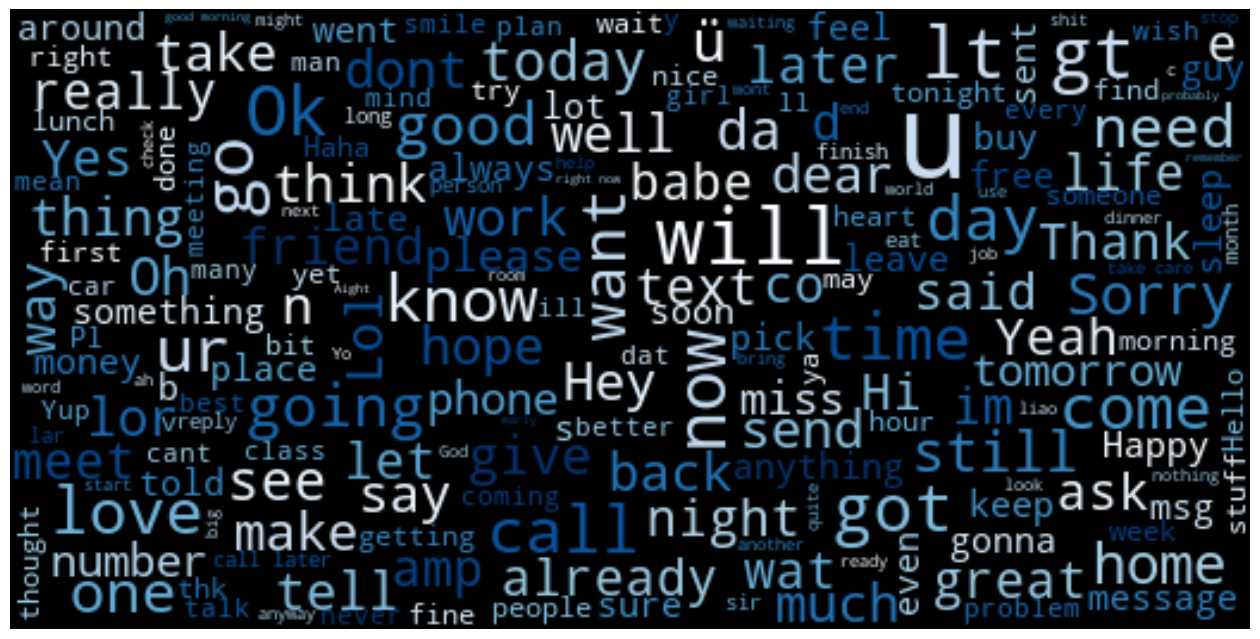

In [113]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

...shows that “now”, “work”, “How”, “Ok” and “Sorry” are the most commonly appeared word in ham messages.

# The spam message WordCloud

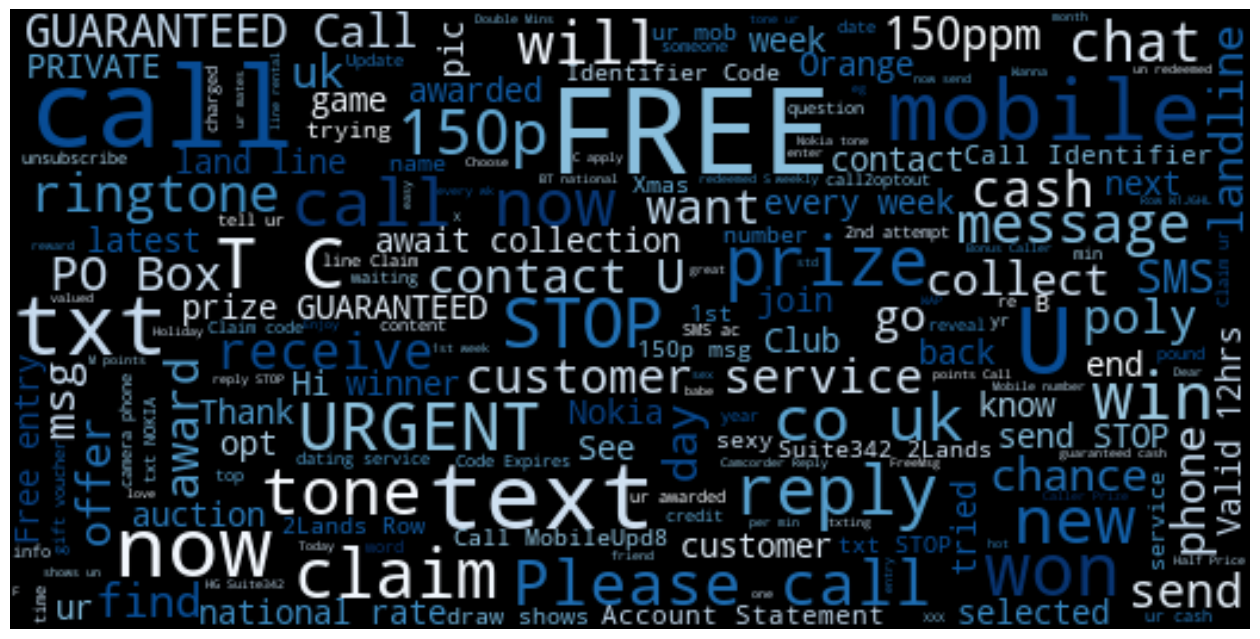

In [114]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

...shows that “Free”, “call”, “text”, “claim” and“reply” are most commonly appeared words in spam messages.

15.481865284974095

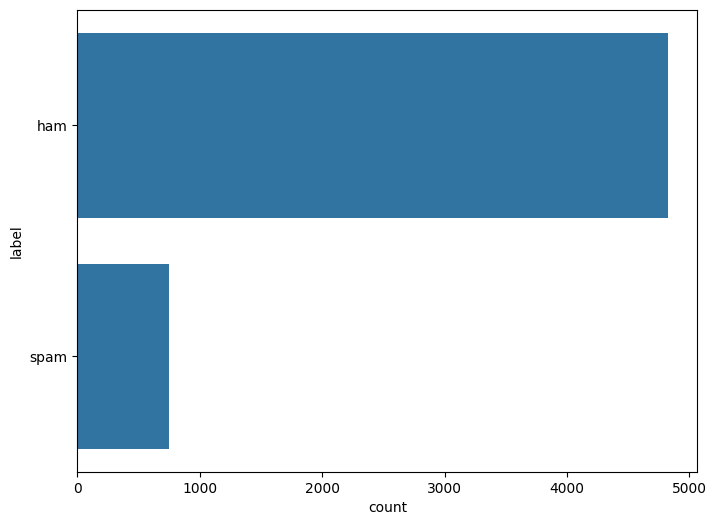

In [115]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(messages.label)
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100 # 15.48%


Above, the bar chart shows that the classes are imbalanced.

# Downsampling to handle the imbalance data

In [116]:
# one way to fix it is to downsample the ham msg
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)


(747, 2) (747, 2)


There are now 747 messages in each class.

Text(0.5, 0, 'Message types')

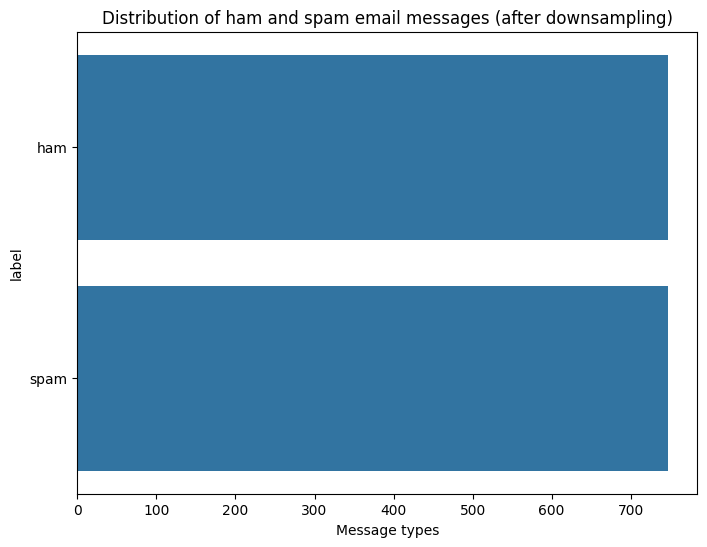

In [117]:
# Create a dataframe with these ham and spam msg
msg_df = pd.concat([ham_msg_df, spam_msg_df]).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

# Prepare train/test data and pre-process text

In [118]:
# Map ham label as 0 and spam as 1
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values
# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.2, random_state=434)

# Tokenization

In [119]:
# Defining pre-processing hyperparameters
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500


In [120]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)


In [121]:
# Get the word_index 
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'u': 8,
 'your': 9,
 'for': 10,
 'is': 11,
 '2': 12,
 'and': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'on': 17,
 'in': 18,
 'ur': 19,
 'have': 20,
 '4': 21,
 'txt': 22,
 'of': 23,
 'are': 24,
 'with': 25,
 'me': 26,
 'from': 27,
 'text': 28,
 'get': 29,
 'my': 30,
 'it': 31,
 'stop': 32,
 'just': 33,
 'mobile': 34,
 'this': 35,
 'will': 36,
 'be': 37,
 'no': 38,
 'that': 39,
 'claim': 40,
 'reply': 41,
 'can': 42,
 'so': 43,
 'send': 44,
 'www': 45,
 'we': 46,
 'only': 47,
 'our': 48,
 'not': 49,
 'out': 50,
 'at': 51,
 'do': 52,
 'if': 53,
 'prize': 54,
 'new': 55,
 'go': 56,
 'cash': 57,
 'but': 58,
 '150p': 59,
 'uk': 60,
 '1': 61,
 'nokia': 62,
 'who': 63,
 't': 64,
 'all': 65,
 'win': 66,
 'please': 67,
 'won': 68,
 'up': 69,
 'tone': 70,
 'when': 71,
 "i'm": 72,
 'week': 73,
 'been': 74,
 'what': 75,
 'msg': 76,
 '50': 77,
 'com': 78,
 'urgent': 79,
 'how': 80,
 'service': 81,
 'phone': 82,
 'time': 83,
 

In [122]:
# check how many words 
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)


There are 4169 unique tokens in training data. 


# Sequencing and Padding

In [123]:
# Sequencing and padding on training and testing 
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)


In [124]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)


Shape of training tensor:  (1195, 50)
Shape of testing tensor:  (299, 50)


In [125]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])


(27, 24)

In [126]:
# After padding
len(training_padded[0]), len(training_padded[1])


(50, 50)

As depicted below, the padded sequence has length of 50.

In [127]:
print(training_padded[0])

[  1  47 186   9  34   1   3  24   1   2 274   2   7 152 275 135  34  10
  15   6   7  34 274  85  15  17   1   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


## Dense Spam Detection Model
training the model using a Dense architecture

Define hyper-parameters:

In [128]:
vocab_size = 500 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24


In [129]:
#Dense model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [130]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d_2  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_7 (Dense)             (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8433 (32.94 KB)
Trainable params: 8433 (32.94 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

# Compiling the Dense model

In [131]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

# Training and evaluating the Dense model

In [132]:
# fitting a dense spam detector model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 1s - loss: 0.6904 - accuracy: 0.6870 - val_loss: 0.6852 - val_accuracy: 0.8227 - 1s/epoch - 35ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6732 - accuracy: 0.8494 - val_loss: 0.6615 - val_accuracy: 0.8294 - 119ms/epoch - 3ms/step
Epoch 3/30
38/38 - 0s - loss: 0.6315 - accuracy: 0.8787 - val_loss: 0.6043 - val_accuracy: 0.8528 - 132ms/epoch - 3ms/step
Epoch 4/30
38/38 - 0s - loss: 0.5518 - accuracy: 0.8837 - val_loss: 0.5140 - val_accuracy: 0.8528 - 124ms/epoch - 3ms/step
Epoch 5/30
38/38 - 0s - loss: 0.4464 - accuracy: 0.8946 - val_loss: 0.4174 - val_accuracy: 0.8729 - 117ms/epoch - 3ms/step
Epoch 6/30
38/38 - 0s - loss: 0.3491 - accuracy: 0.9088 - val_loss: 0.3428 - val_accuracy: 0.8863 - 114ms/epoch - 3ms/step
Epoch 7/30
38/38 - 0s - loss: 0.2813 - accuracy: 0.9247 - val_loss: 0.2862 - val_accuracy: 0.8963 - 131ms/epoch - 3ms/step
Epoch 8/30
38/38 - 0s - loss: 0.2361 - accuracy: 0.9314 - val_loss: 0.2511 - val_accuracy: 0.8997 - 135ms/epoch - 4ms/step
Epoch 9/30
38/38 -

The model resulted , training loss: 0.07, training accuracy: 98%, validation loss: 0.11 and validation accuracy: 94%

In [133]:
# Model performance on test data 
model.evaluate(testing_padded, test_labels)


10/10 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9565


[0.10360381007194519, 0.95652174949646]

In [134]:
metrics = pd.DataFrame(history.history)
metrics[:2]


,loss,accuracy,val_loss,val_accuracy
0,0.690403,0.687029,0.685158,0.822742
1,0.673250,0.849372,0.661470,0.829431


In [135]:
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
metrics[:2]

,Training_Loss,Training_Accuracy,Validation_Loss,Validation_Accuracy
0,0.690403,0.687029,0.685158,0.822742
1,0.673250,0.849372,0.661470,0.829431


# further visualization of the results by plotting loss and accuracy by number of epochs

In [144]:
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])


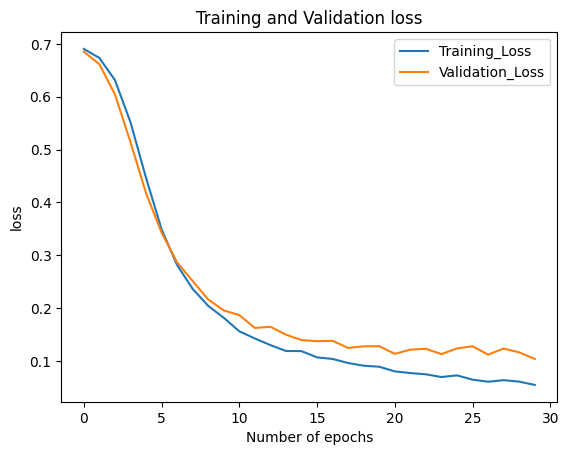

In [137]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')


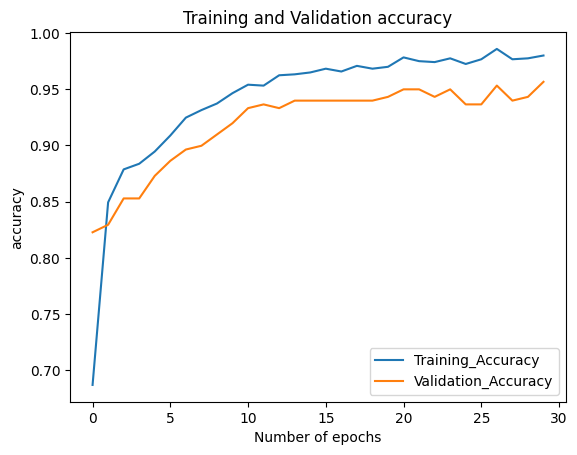

In [138]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')


# Long Short Term Memory (LSTM) Model
LSTM spam detection model architecture

hyper-parameters used for LSTM model

In [145]:
#LSTM hyperparameters
n_lstm = 20
drop_lstm =0.2


In [146]:
#LSTM Spam detection architecture
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))


# Compiling the LSTM model

In [147]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


# Training and evaluation LSTM model

In [148]:
# Training
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded, train_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 7s - loss: 0.5576 - accuracy: 0.7665 - val_loss: 0.4161 - val_accuracy: 0.8294 - 7s/epoch - 179ms/step
Epoch 2/30
38/38 - 1s - loss: 0.2157 - accuracy: 0.9197 - val_loss: 0.2041 - val_accuracy: 0.9331 - 1s/epoch - 27ms/step
Epoch 3/30
38/38 - 1s - loss: 0.1212 - accuracy: 0.9632 - val_loss: 0.1381 - val_accuracy: 0.9431 - 997ms/epoch - 26ms/step
Epoch 4/30
38/38 - 1s - loss: 0.0943 - accuracy: 0.9682 - val_loss: 0.2186 - val_accuracy: 0.9365 - 1s/epoch - 26ms/step
Epoch 5/30
38/38 - 1s - loss: 0.0784 - accuracy: 0.9774 - val_loss: 0.1036 - val_accuracy: 0.9532 - 1s/epoch - 26ms/step
Epoch 6/30
38/38 - 1s - loss: 0.0799 - accuracy: 0.9715 - val_loss: 0.2093 - val_accuracy: 0.9298 - 1s/epoch - 27ms/step
Epoch 7/30
38/38 - 1s - loss: 0.0487 - accuracy: 0.9841 - val_loss: 0.2541 - val_accuracy: 0.9365 - 982ms/epoch - 26ms/step


The validation loss and accuracy from LSTM are 0.25% and 94%, respectively.


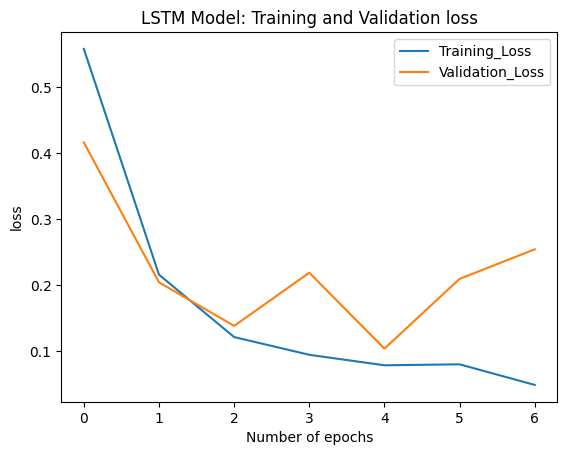

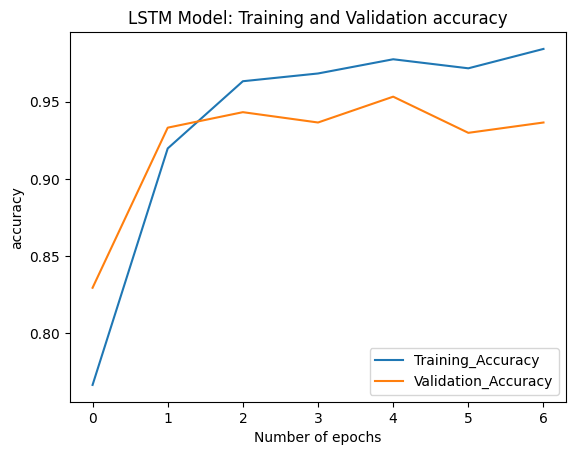

In [149]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')


# Bi-directional Long Short Term Memory (BiLSTM) Model
In Bi-directional LSTM architecture, the only difference from LSTM is that Bidirectional wrapper was used.

In [151]:
# Biderectional LSTM Spam detection architecture
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))


# Compiling the BiLSTM model

In [155]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


# Training and evaluation of BiLSTM model

In [156]:
# Training
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(training_padded, train_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)


Epoch 1/30
38/38 - 6s - loss: 0.5889 - accuracy: 0.7690 - val_loss: 0.4370 - val_accuracy: 0.7893 - 6s/epoch - 150ms/step
Epoch 2/30
38/38 - 1s - loss: 0.2592 - accuracy: 0.8954 - val_loss: 0.1696 - val_accuracy: 0.9331 - 717ms/epoch - 19ms/step
Epoch 3/30
38/38 - 1s - loss: 0.1381 - accuracy: 0.9498 - val_loss: 0.1361 - val_accuracy: 0.9398 - 711ms/epoch - 19ms/step
Epoch 4/30
38/38 - 1s - loss: 0.0913 - accuracy: 0.9640 - val_loss: 0.1957 - val_accuracy: 0.9431 - 754ms/epoch - 20ms/step
Epoch 5/30
38/38 - 1s - loss: 0.0652 - accuracy: 0.9774 - val_loss: 0.1956 - val_accuracy: 0.9431 - 790ms/epoch - 21ms/step


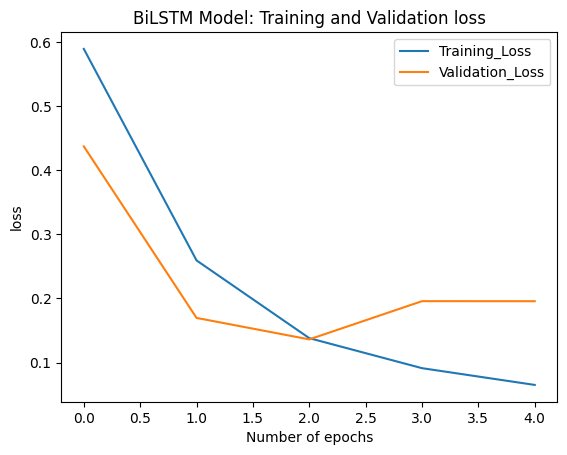

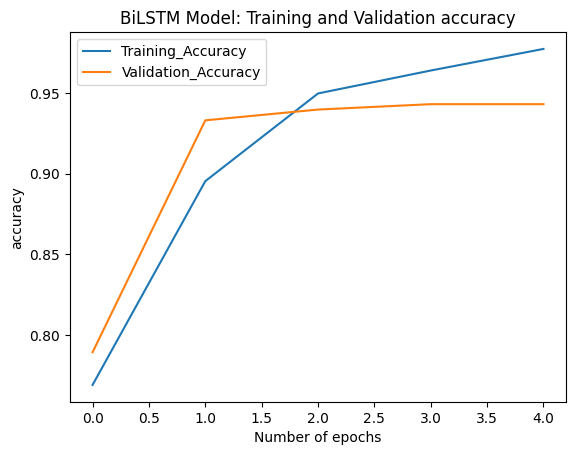

In [157]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')


# Compare three different models and select a final one
Dense, LSTM and Bi-LSTM models are comparable in terms of loss and accuracy.

In [158]:
# Comparing three different models
print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded, test_labels)} " )
print(f"LSTM architecture loss and accuracy: {model1.evaluate(testing_padded, test_labels)} " )
print(f"Bi-LSTM architecture loss and accuracy: {model2.evaluate(testing_padded, test_labels)} " )


10/10 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.9565
Dense architecture loss and accuracy: [0.10360381007194519, 0.95652174949646] 
10/10 [==============================] - 0s 10ms/step - loss: 0.2541 - accuracy: 0.9365
LSTM architecture loss and accuracy: [0.25413721799850464, 0.9364548325538635] 
10/10 [==============================] - 0s 6ms/step - loss: 0.1956 - accuracy: 0.9431
Bi-LSTM architecture loss and accuracy: [0.19564342498779297, 0.9431437849998474] 


# Predict spam/ham on new messages

<!-- Scenario 1: Using raw text from our data: -->

In [159]:
# display long string 
pd.options.display.max_colwidth=100
messages[:3]


,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...


First 3 observations from raw data

In [160]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [161]:
# Defining prediction function
def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))
predict_spam(predict_msg)

1/1 [==============================] - 0s 252ms/step


array([[0.00812964],
       [0.00542571],
       [0.9999581 ]], dtype=float32)

As shown above, the model correctly predicts the first two sentences as not spam whereas the third one as spam. There is a 99% chance that the third sentence is spam.


<!-- Scenario 2: Using newly created text message and see how the model classifies them. -->

In [162]:
predict_msg = ["You are awarded a Nikon Digital Camera. Call now",
               "Call me",
          "What's up?"]
predict_spam(predict_msg)


1/1 [==============================] - 0s 34ms/step


array([[0.9119377 ],
       [0.02681077],
       [0.01015058]], dtype=float32)

Our model correctly classified the first message as spam (91% chance to be spam) whereas the rest as ham.

# THE END
# THANK YOU!